In [11]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind,chi2_contingency, f_oneway



In [6]:

# Load the dataset
data = pd.read_csv('DataFiles/insurance_insurance.csv')

# Q1. Do smokers have higher insurance charges than non-smokers?
Null Hypothesis (H0): There is no significant difference in insurance charges between smokers and non-smokers.
Alternative Hypothesis (H1): Smokers have significantly higher insurance charges than non-smokers.

Test: Two-sample t-test

Assumptions:
Charges are normally distributed.
Similar variance between smoker and non-smoker groups


P-value for the t-test: 8.271435842179101e-283


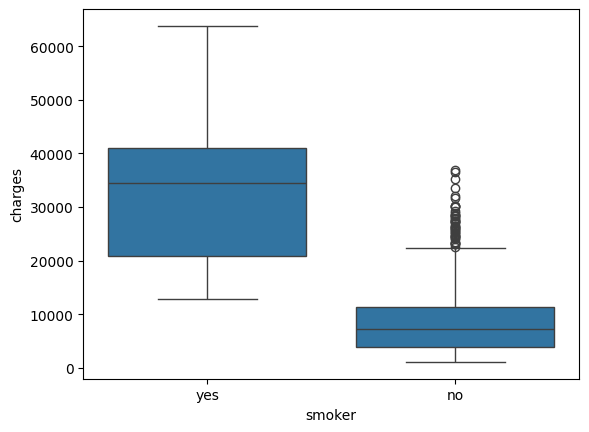

In [13]:
# Selecting the data
smoker_charges = data[data['smoker'] == 'yes']['charges']
non_smoker_charges = data[data['smoker'] == 'no']['charges']

# Perform t-test
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)

# Visualization
sns.boxplot(x='smoker', y='charges', data=data, showfliers=True)
# Output
print(f"P-value for the t-test: {p_value}")

Interpretation:
Null Hypothesis (H0): There is no significant difference in insurance charges between smokers and non-smokers.
Alternative Hypothesis (H1): Smokers have significantly higher insurance charges than non-smokers.
P-value:  Null hypothesis is not rejected.

# Q2. Are men more likely to smoke than women?
Null Hypothesis (H0): There is no significant difference in smoking habits between men and women.
Alternative Hypothesis (H1): The proportion of smokers is significantly different between men and women.

Test: Chi-squared test for independence

Assumptions:
Categorical data (smoker/non-smoker) for both men and women.

P-value for the chi-squared test: 0.006548143503580696


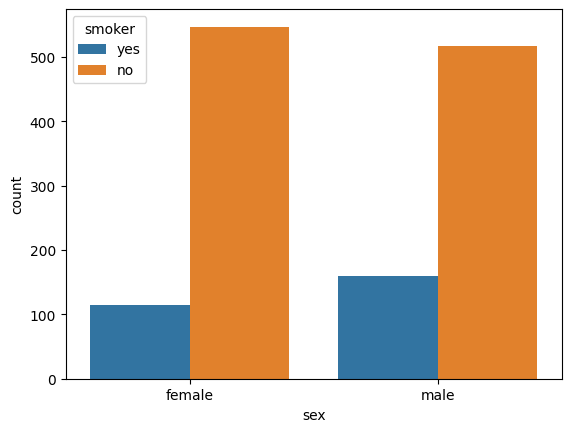

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(data['sex'], data['smoker'])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Visualization with outliers
sns.countplot(x='sex', hue='smoker', data=data)
print(f"P-value for the chi-squared test: {p_value}")


Interpretation:

Null Hypothesis (H0): There is no significant difference in smoking habits between men and women.
Alternative Hypothesis (H1): The proportion of smokers is significantly different between men and women.
P-value: Null hypothesis is rejected.

# Q3. Do different regions have different charges, on average?
Null Hypothesis (H0): There is no significant difference in average insurance charges among different regions.
Alternative Hypothesis (H1): There is a significant difference in average insurance charges among different regions.

Test: Analysis of Variance (ANOVA) test

Assumptions:

1. Charges are normally distributed in each region.
2. Homogeneity of variances among different regions.


P-value for the ANOVA test: 0.0308933560705201


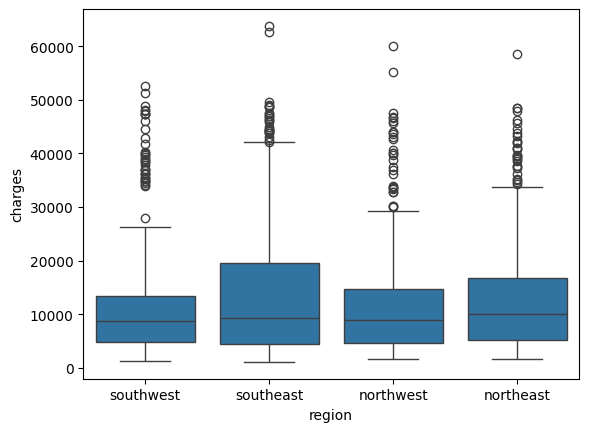

In [15]:
# Perform ANOVA test
f_stat, p_value = f_oneway(data['charges'][data['region'] == 'southwest'],
                            data['charges'][data['region'] == 'southeast'],
                            data['charges'][data['region'] == 'northwest'],
                            data['charges'][data['region'] == 'northeast'])

# Visualization
sns.boxplot(x='region', y='charges', data=data, showfliers=True)
# Output
print(f"P-value for the ANOVA test: {p_value}")

Interpretation:

Null Hypothesis (H0): There is no significant difference in average insurance charges among different regions.
Alternative Hypothesis (H1): There is a significant difference in average insurance charges among different regions.
P-value: Null hypothesis is rejected.